# (Ford GoBike System Data pattern exploration)
## by (Abdullah Emad)

## Investigation Overview

* to discribe common pattern in bike trip users and classify users based on their activities

## Dataset Overview

* This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [17]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("201902-fordgobike-tripdata-cleaned.csv")

df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month,member_age
0,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.416667,2019-02-28,23,Thursday,February,45
1,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,29.883333,2019-02-28,23,Thursday,February,60
2,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,19.116667,2019-02-28,23,Thursday,February,36
3,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No,26.916667,2019-02-28,23,Thursday,February,30
4,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No,26.166667,2019-02-28,23,Thursday,February,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170201,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996,Male,No,8.000000,2019-02-01,0,Friday,February,23
170202,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984,Male,No,5.216667,2019-02-01,0,Friday,February,35
170203,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990,Male,Yes,2.350000,2019-02-01,0,Friday,February,29
170204,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988,Male,No,2.316667,2019-02-01,0,Friday,February,31


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170206 entries, 0 to 170205
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             170206 non-null  int64  
 1   start_time               170206 non-null  object 
 2   end_time                 170206 non-null  object 
 3   start_station_id         170015 non-null  float64
 4   start_station_name       170015 non-null  object 
 5   start_station_latitude   170206 non-null  float64
 6   start_station_longitude  170206 non-null  float64
 7   end_station_id           170015 non-null  float64
 8   end_station_name         170015 non-null  object 
 9   end_station_latitude     170206 non-null  float64
 10  end_station_longitude    170206 non-null  float64
 11  bike_id                  170206 non-null  int64  
 12  user_type                170206 non-null  object 
 13  member_birth_year        170206 non-null  int64  
 14  memb

In [19]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'duration_minute', 'start_date', 'start_hourofday', 'start_dayofweek',
       'start_month', 'member_age'],
      dtype='object')

In [20]:
df.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           191
start_station_name         191
start_station_latitude       0
start_station_longitude      0
end_station_id             191
end_station_name           191
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
duration_minute              0
start_date                   0
start_hourofday              0
start_dayofweek              0
start_month                  0
member_age                   0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
df.member_gender.value_counts()


Male      126731
Female     39951
Other       3524
Name: member_gender, dtype: int64

## Data cleaning

In [23]:
dff=df.copy(deep=True)

In [24]:

dff['member_gender'] = dff['member_gender'].astype('category')
dff['user_type'] = dff['user_type'].astype('category')

dff['start_time'] = pd.to_datetime(dff['start_time'])
dff['end_time'] = pd.to_datetime(dff['end_time'])

dff['start_station_id'] = dff['start_station_id'].astype('str')
dff['end_station_id'] = dff['end_station_id'].astype('str')

dff['bike_id'] = dff['bike_id'].astype('str')



weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
dff['start_dayofweek'] = dff['start_dayofweek'].astype(weekdaycat)

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
dff['start_month'] = dff['start_month'].astype(monthcat)
dff.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170206 entries, 0 to 170205
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             170206 non-null  int64         
 1   start_time               170206 non-null  datetime64[ns]
 2   end_time                 170206 non-null  datetime64[ns]
 3   start_station_id         170206 non-null  object        
 4   start_station_name       170015 non-null  object        
 5   start_station_latitude   170206 non-null  float64       
 6   start_station_longitude  170206 non-null  float64       
 7   end_station_id           170206 non-null  object        
 8   end_station_name         170015 non-null  object        
 9   end_station_latitude     170206 non-null  float64       
 10  end_station_longitude    170206 non-null  float64       
 11  bike_id                  170206 non-null  object        
 12  user_type       

## (Visualization 1)

# Counting user types percentages

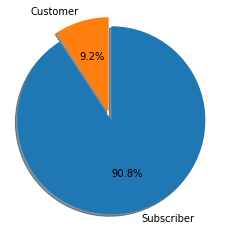

In [25]:

sorted_vals = dff.user_type.value_counts()/dff.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

# user types was not balanced data , more subscribers than customers.

##visualizing User Types and Their Monthly Usage

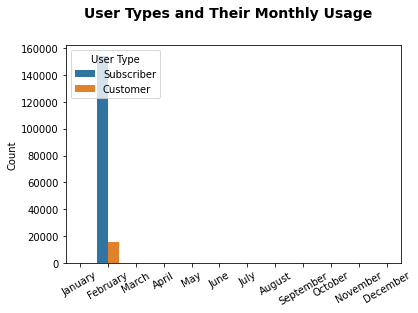

In [26]:
ax = sb.countplot(data=dff, x='start_month', hue='user_type', hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.xlabel('');
plt.ylabel('Count');
plt.suptitle('User Types and Their Monthly Usage', fontsize=14, fontweight='semibold', y=1.015);

subscribers uses bike trips more than customers.

## (Visualization 2)

# investigating user type vs day of week  vs Average Trip Duration (minutes)

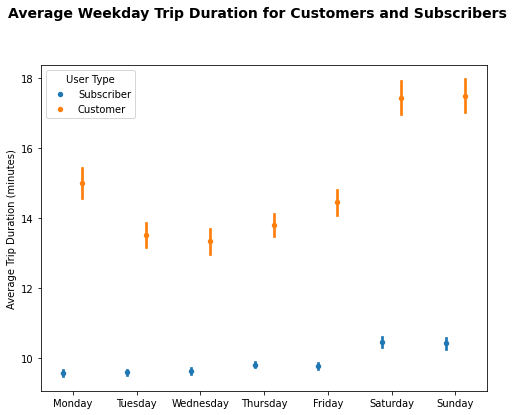

In [27]:
plt.figure(figsize=[8, 6]);
ax = sb.pointplot(data=dff, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, markers='.', linestyles="", hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xlabel('');
plt.ylabel('Average Trip Duration (minutes)');
plt.suptitle('Average Weekday Trip Duration for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.015);

# subscribers ride much shorter trips compared to customers on each day of the week, indicating that likely customers used them for entertainment and subscribers  for work.

## (Visualization 3)



#investigating the relation of member age and trip duration for each user type

Text(0.5, 1.0, 'member age vs  trip duration')

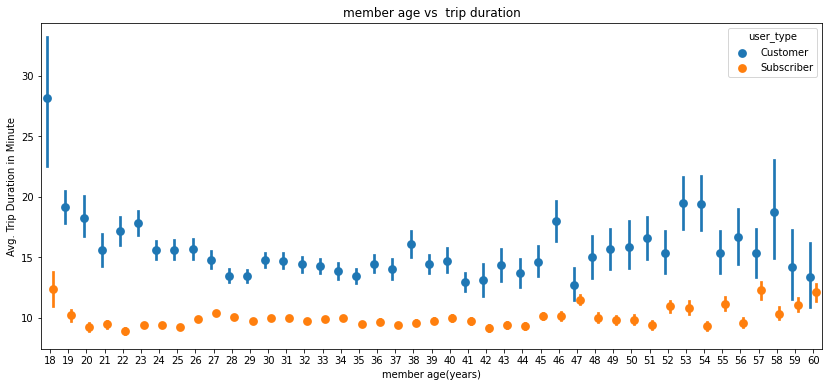

In [28]:
plt.figure(figsize=[14,6])
sb.pointplot(data=dff.sort_values('member_age'), x='member_age', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('member age(years)');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('member age vs  trip duration')

comment
* subscribers ride much shorter trips compared to customers for all ages,indicating that customers usually used it for entertainment.
* customers show pattern of large trip duration around 20 and 53 years old indicating high entertainment periods.

# main findings:

* subscribers ride much shorter trips compared to customers on each hour of the day that point toward using trips during going and returning from work that is relatively close to home( deduced from short period of trip time )

* customers used bike trips over weekends usually for tours.

*  older aged users use bike trips mostly for work more than younger users.

* subscribers ride much shorter trips compared to customers for all ages,indicating that customers usually used it for entertainment.

* customers show pattern of large trip duration around 20 and 53 years old indicating high entertainment periods.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert slide_deck_bike_trips2.ipynb --to slides --post serve  --no-input --no-prompt

In [ ]:
jupyter nbconvert slide_deck_bike_trips2.ipynb --to slides --post serve --template slides